# Evolution of photon and relativistic densities

In [1]:
from astropy import units as u
from astropy import constants as const
from scipy.special import zeta
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from astropy.cosmology import Planck18

In [2]:
rho_crit = 8.62e-27 * u.kg / (u.m **3)
omega_M = 0.301
omega_b = 0.0497
omega_gamma = 5.51e-5

* Calculate the photon-to-baryon ratio $\eta$. You can assume that the baryons consist of
protons.

First we calculate $\rho_{0i} = \Omega_i * \rho_{crit}$

## a)

In [3]:
rho_M_0 = omega_M * rho_crit
rho_b_0 = omega_b * rho_crit
rho_gamma_0 = omega_gamma * rho_crit

We easily get the proton number density  using the proton mass $m_p$: $$n_{p} = \frac{\rho_{b,0}}{m_p} $$

In [4]:
# number density of proton 

n_proton = rho_b_0 / const.m_p 
print(n_proton)

0.2561331965892618 1 / m3


For photon number density we recall the average energy of particles in a blackbody, 
$$ u(T) = \frac{\pi^4}{15 \cdot 2 \zeta(3)} \cdot k_B \cdot T $$
The number density is then 
$$ n_\gamma =  \frac{\rho_{\gamma, 0}}{u(T_{CMB}) \cdot c^{-2}}$$ 
with $T_{CMB} = 2.7255 K $

In [5]:
def average_photon_energy(T):
    return np.pi**4 / (15 * 2*zeta(3)) * const.k_B * T

def energy_to_mass(E):
    return E / const.c**2

def average_photon_mass(T):
    return energy_to_mass(average_photon_energy(T))

T0 = 2.7255 * u.K
n_gamma = rho_gamma_0 / average_photon_mass(T0) 
n_gamma.to('m-3')

<Quantity 4.19969346e+08 1 / m3>

Alternatively we could directly use the equation for number density of photons in blackbody radiation, (Refer to section 2.4 and 2.5 in Ryden )

$$ n_\gamma = \beta T^3 $$ 
where 

$$\beta = \frac{2.4041}{\pi^2} \frac{k^3}{\hbar^3c^3} $$

In [6]:
def photon_number_density(T):
    return 2.4041 /np.pi**2 * (const.k_B / (const.hbar * const.c))**3 * T**3

photon_number_density(T0)

<Quantity 4.10724489e+08 1 / m3>

We can than calculate $\eta = n_\gamma / n_b $

In [7]:
eta = n_gamma.to('m-3') / n_proton
eta

<Quantity 1.63965215e+09>

## b)

* How does $\eta$ evolve with redshift?

$$\eta = \frac{n_\gamma}{n_b}$$

$$ n_b \sim \rho_b(z) \sim (1+z)^3 $$

$$ n_\gamma \sim T^3 \sim (1+z)^3$$

$\rightarrow$ $\eta$ does not evolve with redshift

Proof of $T^3 \sim (1+z)^3$ :

Assuming the black body radiation in volume V as a photon gas with energy density $E_\gamma$, it follows the first law of thermodynamics, 

$$dQ = dE + PdV $$

where dQ is the amount of heat flowing into or out of the photon gas in the volume V,but in a homogeneous universe, there is no net flow of heat dQ = 0. Thus, the first law of thermodynamics, applied to an expanding homogeneous universe, is

$$ \frac{dE}{dT} = -P(t)\frac{dV}{dt}$$

For photons of the CMB,  $E = E_\gamma V = \alpha T^4 V, P = P_\gamma = \alpha T^4/3$, the equation above acn be rewritten as, 

$$ \alpha  (4T^3 \frac{dT}{dt}V + T^4 \frac{dV}{dt}) = -\frac{1}{3}\alpha T^4 \frac{dV}{dt}$$

$$\frac{1}{T} \frac{dT}{dt} = - \frac{1}{3V} \frac{dV}{dt}$$

$$while, V \propto a(t)^3$$

$$So, \frac{d}{dt}(ln T) = -\frac{d}{dt}(ln a) $$

$$\implies T(t) \propto a(t)^{-1} $$

$$\implies T(t) \propto (1+z) $$

## c)

* Study the evolution of $\rho_M$ , $\rho_b$ and $\rho_\gamma$ with redshift. At which redshift would the photons come to dominate?

First we define functions to calculate the densities as functions of redshift.

In [8]:
def rho_M(z):
    return rho_M_0 * (1+z)**3

def rho_b(z):
    return rho_b_0 * (1+z)**3

def rho_gamma(z):
    return rho_gamma_0 * (1+z)**4

We then find the intersection of $\rho_\gamma$ with $\rho_M$ and $\rho_b$.

In [9]:
def rootfunc_gamma_over_M(z):
    return rho_gamma(z) - rho_M(z)

gamma_over_M = root(rootfunc_gamma_over_M, 7000).x[0]
print(f'photon dominates over matter at z = {gamma_over_M:.2f}')

def rootfunc_gamma_over_b(z):
    return rho_gamma(z) - rho_b(z)

gamma_over_b = root(rootfunc_gamma_over_b, 1000).x[0]
print(f'photon dominates over baryonic matter at z = {gamma_over_b:.2f}')

photon dominates over matter at z = 5461.79
photon dominates over baryonic matter at z = 901.00


Let's plot these results

In [49]:
redshifts = np.linspace(gamma_over_b-500, gamma_over_M+500, 1000)

plot_rho_M     = rho_M(redshifts)
plot_rho_b     = rho_b(redshifts)
plot_rho_gamma = rho_gamma(redshifts)

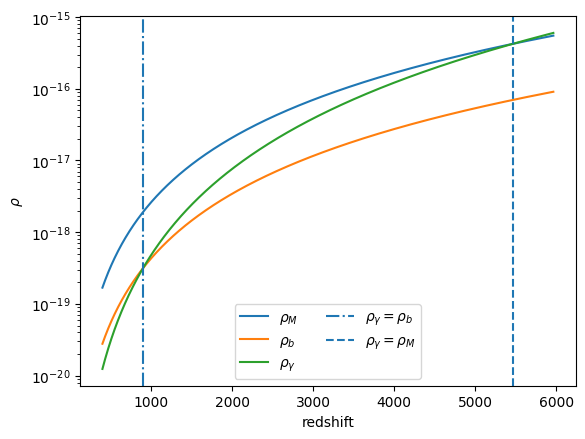

In [50]:
fig, ax = plt.subplots()

labels = [r'$\rho_M$', r'$\rho_b$', r'$\rho_\gamma$']
rhos   = [plot_rho_M, plot_rho_b, plot_rho_gamma]

for label, rho in zip(labels, rhos):
    ax.plot(redshifts, rho, label=label)
    
ax.axvline(gamma_over_b, label=r'$\rho_\gamma = \rho_b$', ls='-.')
ax.axvline(gamma_over_M, label=r'$\rho_\gamma = \rho_M$', ls='--')
    
ax.set_xlabel('redshift')
ax.set_ylabel(r'$\rho$')
ax.legend(ncol=2)
ax.set_yscale('log')

plt.show()

## d)

* We know of at least one more relativistic species, neutrinos, such that the total contribution from relativistic particles is $\Omega_{rel} \geq 8.24 \cdot 10 ^{-5}$. At which redshifts did this relativistic component come to dominate over matter?

In [13]:
omega_rel = 8.24e-5
rho_rel_0 = omega_rel * rho_crit


def rho_relativistic(z):
    return rho_rel_0 * (1+z)**4
    
def rootfunc_rel_over_M(z):
    return rho_relativistic(z) - rho_M(z)

rel_over_M = root(rootfunc_rel_over_M, 5000).x[0]
print(f'Taking neutrinos into account, relativistic particles dominate over matter at z = {rel_over_M:.2f}')
print(f'That is {rel_over_M - gamma_over_M:.2f} difference to photons alone.')

Taking neutrinos into account, relativistic particles dominate over matter at z = 3651.91
That is -1809.88 difference to photons alone.


In [14]:
redshifts = np.linspace(gamma_over_b-500, gamma_over_M+500, 1000)

plot_rho_M     = rho_M(redshifts)
plot_rho_rel = rho_relativistic(redshifts)

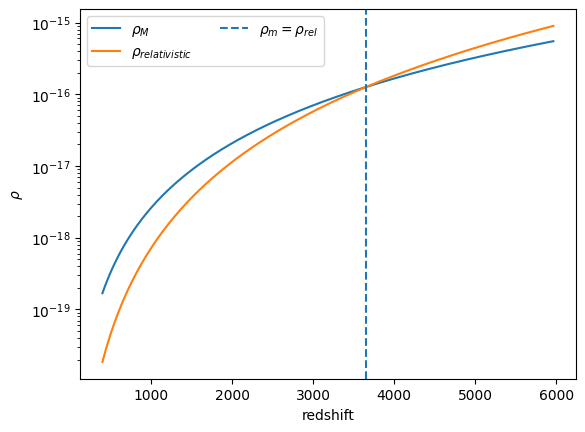

In [20]:
fig, ax = plt.subplots()

labels = [r'$\rho_M$', r'$\rho_{relativistic}$']
rhos   = [plot_rho_M, plot_rho_rel]

for label, rho in zip(labels, rhos):
    ax.plot(redshifts, rho, label=label)
    
ax.axvline(rel_over_M, label=r'$\rho_m = \rho_{rel}$', ls='--')
    
ax.set_xlabel('redshift')
ax.set_ylabel(r'$\rho$')
ax.legend(ncol=2)
ax.set_yscale('log')

plt.show()

# Constrain evolving dark matter

The two scenarios have to match at $z=0$ so we can assume any value for $H_0$. We can take the value of the Planck measurement

In [ ]:
omega_m_0 = 0.3
omega_L_0 = 0.7
eos_parameter_0 = -1
H0 = Planck18.H0

Let's define functions to calculate the equation-of-state parameter
$$ \omega(z, \omega_a) = \omega_0 + \omega_a (1 + \frac{1}{1+z}) $$

the Hubble parameter
$$ H(z, \omega_a) = H_0 \sqrt{ \Omega_M (1 + z)^3 + \Omega_\Lambda (1+z)^{3 (1 + \omega(z, \omega_a))}} $$

and the luminosity distance

$$ d_L(z, \omega_a) = \frac{c}{H_0} \int_0 ^z \frac{H_0}{H(z', \omega_a)} dz' $$

In [ ]:
def eos_parameter(z, eos_parameter_a):
    a = 1 / (1 + z)
    return eos_parameter_0 + eos_parameter_a * (1 - a)

def H(z, eos_parameter_a):
    a = 1 / (1 + z)
    omega_m = omega_m_0 * a ** (-3)
    omega_L = omega_L_0 * a ** (-3 * (1 + eos_parameter(eos_parameter_a, z)))
    return H0 * np.sqrt((omega_m + omega_L))
                   
def luminosity_distance(z, eos_parameter_a):
    
    def E_inverse(zprime):
        return H0 / H(zprime, eos_parameter_a)
    
    integral, integrating_err = quad(E_inverse, 0, z)
    proper_distance = const.c /H0 * integral
    
    return proper_distance * (1+z)

We can calculate the luminosity distance for the cases $\omega_a=0$ and $\omega_a=1$

In [ ]:
for testz in [0, 0.5, 0.7, 1]:
    dldif = luminosity_distance(testz, 0) - luminosity_distance(testz, 1)
    print(f'luminosity distance difference at z={testz:.1f}: {dldif.to("Mpc"):.2f}')

luminosity distance difference at z=0.0: 0.00 Mpc
luminosity distance difference at z=0.5: 71.71 Mpc
luminosity distance difference at z=0.7: 171.76 Mpc
luminosity distance difference at z=1.0: 415.41 Mpc


We can see that there is a difference at higher redshifts. Let's compute the distance modulus
$$ \mu(d_L) = 5 \log_{10}(d_L / 10 \mathrm{pc}) $$
at redshift $z=0.7$. 

In [ ]:
def distance_modulus(lum_dist):
    return 5 * np.log10(lum_dist / (10*u.pc))

In [ ]:
test_z = 0.7
dl0 = luminosity_distance(test_z, 0)
dl1 = luminosity_distance(test_z, 1)
mu0 = distance_modulus(dl0)
mu1 = distance_modulus(dl1)
dmu = mu0 - mu1
print('To distinguish between the two scenarios we have to measure the distance modulus')
print(f'at z={test_z:.1f} with an accuracy of {dmu:.3f}')

To distinguish between the two scenarios we have to measure the distance modulus
at z=0.7 with an accuracy of 0.086


In [ ]:
redshifts = np.linspace(0, 1, 100)
lum_dist_a0 = u.Quantity([luminosity_distance(ir, 0) for ir in redshifts])
lum_dist_a1 = u.Quantity([luminosity_distance(ir, 1) for ir in redshifts])

zoomed_redshifts = np.linspace(0.69, 0.71, 100)
zoomed_lum_dist_a0 = u.Quantity([luminosity_distance(ir, 0) for ir in zoomed_redshifts])
zoomed_lum_dist_a1 = u.Quantity([luminosity_distance(ir, 1) for ir in zoomed_redshifts])

/Users/alicetownsend/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/alicetownsend/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


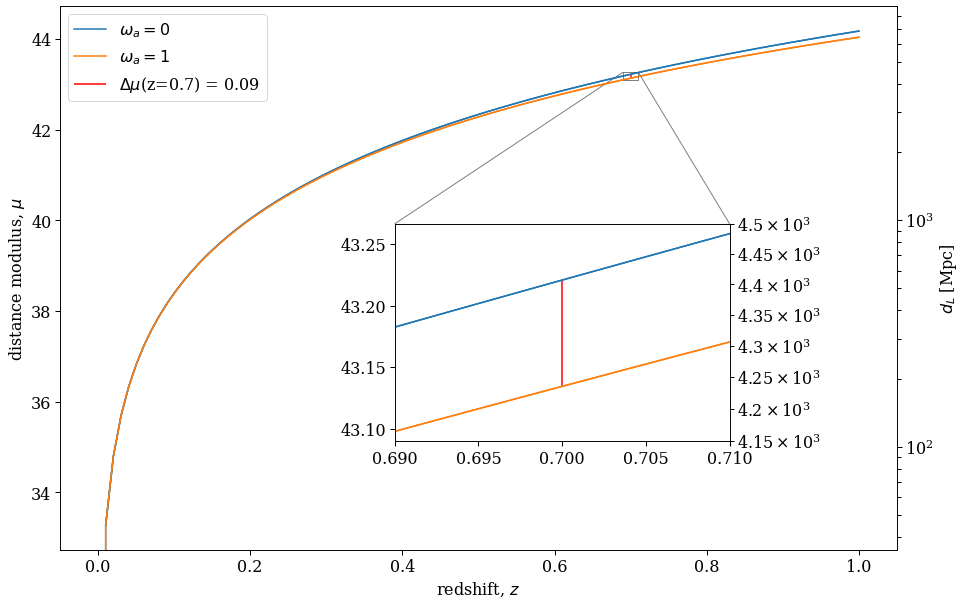

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

dl_unit = 'Mpc'

ax.plot(redshifts, distance_modulus(lum_dist_a0), label='$\omega_a = 0$', c='C0')
ax.plot(redshifts, distance_modulus(lum_dist_a1), label='$\omega_a = 1$', c='C1')
y1 = distance_modulus(luminosity_distance(0.7, 1))
y2 = y1 + dmu
ax.vlines(test_z, y1, y2, color='red', label=f"$\Delta \mu$(z={test_z:.1f}) = {dmu:.2f}")
ax.set_ylabel('distance modulus, $\mu$')
ax.set_xlabel('redshift, $z$')
ax.legend()

zoomed_ax = ax.inset_axes([0.4, 0.2, 0.4, 0.4])
zoomed_ax.plot(zoomed_redshifts, distance_modulus(zoomed_lum_dist_a0), c='C0')
zoomed_ax.plot(zoomed_redshifts, distance_modulus(zoomed_lum_dist_a1), c='C1')

zoomed_ax.set_xlim([min(zoomed_redshifts), max(zoomed_redshifts)])
zoomed_ax.vlines(test_z, y1, y2, color='red')
ax.indicate_inset_zoom(zoomed_ax, edgecolor='k')

ax2 = ax.twinx()
ax2.plot(redshifts, lum_dist_a0.to(dl_unit))
ax2.plot(redshifts, lum_dist_a1.to(dl_unit))
ax2.set_ylabel(f'$d_L$ [{dl_unit}]')
ax2.set_yscale('log')

zoomed_ax2 = zoomed_ax.twinx()
zoomed_ax2.plot(zoomed_redshifts, zoomed_lum_dist_a0.to(dl_unit), c='C0')
zoomed_ax2.plot(zoomed_redshifts, zoomed_lum_dist_a1.to(dl_unit), c='C1')
zoomed_ax2.set_yscale('log')

plt.show()
plt.close()